## Analyze discounts
### It is time to find out whether offering discounts is beneficial for the company.

## Original Business Questions
Your analytical and business skills are needed to provide clarity in the following aspects:

    How should products be classified into different categories to simplify reports and analysis?
    What is the distribution of product prices across different categories?
    How many products are being discounted?
    How big are the offered discounts as a percentage of the product prices?
    How do seasonality and special dates (Christmas, Black Friday) affect sales?
    How could data collection be improved?

At the end of this project (your instructor will set the exact date), you are expected to give a presentation to the company board and present the results of your analysis. The presentation needs to be concise, but also engaging and convincing.

## Initialization

In [1]:
import pandas as pd

# orders_cl.csv
orders_qlty = pd.read_csv('csv_files/final_orders.csv')

# orderlines_cl.csv
orderlines_qlty = pd.read_csv('csv_files/final_orderlines.csv')

# products_cl.csv
products_qlty = pd.read_csv('csv_files/final_products.csv')

In [2]:
orderlines_qlty["date"] = pd.to_datetime(orderlines_qlty["date"])
orders_qlty["created_date"] = pd.to_datetime(orders_qlty["created_date"])

In [3]:
orderlines_qlty.info()
orders_qlty.info()
products_qlty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40985 non-null  int64         
 1   created_date  40985 non-null  datetime64[ns]
 2   total_paid  

In [4]:
ord_df = orders_qlty.copy()
ol_df = orderlines_qlty.copy()
prod_df = products_qlty.copy()

## clean prod_df (not necessary)

In [5]:
skus = ol_df.sku.unique()
prod_df_cut = prod_df[prod_df.sku.isin(skus)].copy()

In [6]:
ol_df.groupby('sku')['unit_price'].mean()

sku
8MO0001-A     12.960000
8MO0003-A     12.850000
8MO0007       22.275714
8MO0008       21.590000
8MO0009       17.474000
                ...    
ZAG0040       26.990000
ZAG0041       19.990000
ZAG0042       19.990000
ZEP0007      125.990000
par0072      204.495000
Name: unit_price, Length: 5098, dtype: float64

In [7]:
ol_df.groupby('sku')['unit_price'].count().sort_values()

sku
8MO0001-A      1
OWC0123-A      1
OWC0124-A      1
BOS0035-A      1
OWC0137        1
            ... 
SAM0074      298
APP0927      378
APP0698      478
APP1922      511
APP1190      867
Name: unit_price, Length: 5098, dtype: int64

In [8]:
ol_df.loc[ol_df['sku']=='APP1190', 'unit_price'].value_counts()

unit_price
51.00    278
56.00    276
54.00     80
52.99     71
55.99     41
54.88     23
53.12     19
61.00     18
64.99     18
64.00     16
54.90      7
70.00      7
53.00      6
58.99      4
62.72      1
67.76      1
59.99      1
Name: count, dtype: int64

## Answer

In [9]:
del ol_df['product_id']

In [10]:
ol_prod_df_merge = ol_df.merge(
                                prod_df[['sku', 'price']],
                                how='left',
                                on='sku'
                                )
prod_df.info()
ol_df.info()
ol_prod_df_merge.info()
ol_prod_df_merge.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_quantity  53231 non-null  int64         
 3   sku               53231 non-null  object        
 4   unit_price        53231 non-null  float64       
 5   date              53231 non

,id,id_order,product_quantity,sku,unit_price,date,price
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,60.99
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,22.95
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,89.00
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,76.99
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,299.99
5,1119154,299563,1,BEA0065,256.49,2017-01-01 02:42:05,299.95
6,1119155,299564,1,SAT0010,18.99,2017-01-01 02:43:37,29.99
7,1119181,299571,1,SYN0139,166.24,2017-01-01 04:00:44,175.99
8,1119188,299578,1,LOG0191,142.49,2017-01-01 08:21:26,209.00
9,1119189,299579,1,LGE0031-A,127.08,2017-01-01 08:23:14,159.00


In [11]:
# rename the column name:
ol_prod_df_merge = ol_prod_df_merge.rename(columns={'price': 'prod_price'})

In [12]:
# add the discount column
ol_prod_df_merge['discount'] = ol_prod_df_merge.prod_price - ol_prod_df_merge.unit_price
ol_prod_df_merge.info()
ol_prod_df_merge.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_quantity  53231 non-null  int64         
 3   sku               53231 non-null  object        
 4   unit_price        53231 non-null  float64       
 5   date              53231 non-null  datetime64[ns]
 6   prod_price        53231 non-null  float64       
 7   discount          53231 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 3.2+ MB


,id,id_order,product_quantity,sku,unit_price,date,prod_price,discount
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,13.50
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,3.96
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,89.00,16.81
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,76.99,16.09
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,299.99,157.50
5,1119154,299563,1,BEA0065,256.49,2017-01-01 02:42:05,299.95,43.46
6,1119155,299564,1,SAT0010,18.99,2017-01-01 02:43:37,29.99,11.00
7,1119181,299571,1,SYN0139,166.24,2017-01-01 04:00:44,175.99,9.75
8,1119188,299578,1,LOG0191,142.49,2017-01-01 08:21:26,209.00,66.51
9,1119189,299579,1,LGE0031-A,127.08,2017-01-01 08:23:14,159.00,31.92


In [13]:
ol_prod_df_merge['discount'].describe()

count    53231.000000
mean        26.116673
std         45.545881
min       -170.990000
25%          5.250000
50%         15.000000
75%         31.000000
max       1320.000000
Name: discount, dtype: float64

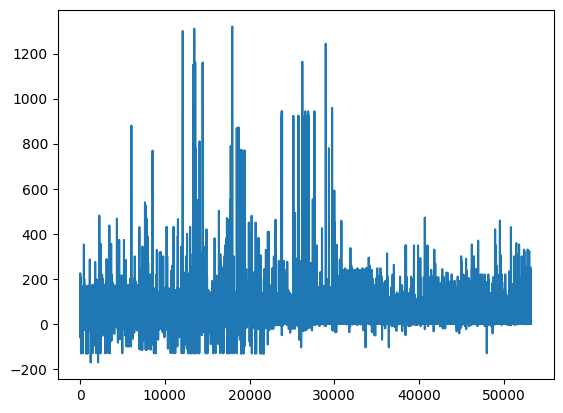

In [14]:
ol_prod_df_merge['discount'].plot();

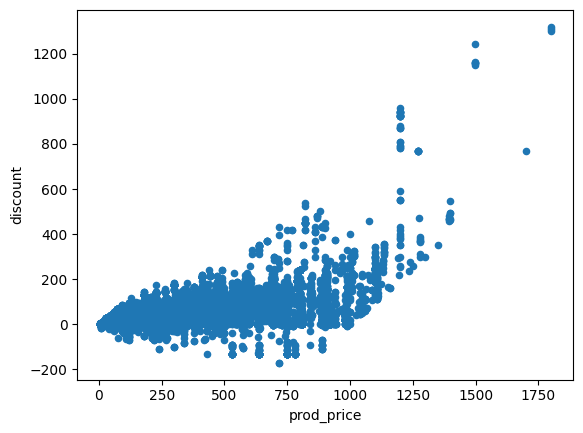

In [15]:
ol_prod_df_merge.plot.scatter(x="prod_price",
                              y="discount",
                             );
                              # c="unit_price",
                              # s=50,
                              # cmap="viridis",
                              # figsize=(12,8)
                              # );

In [49]:
# add the discount column
# discount : prod_price = x : 100 -> prcntg = ( discount * 100 ) / prod_price
ol_prod_df_merge['discount_prcntg'] = round(( ol_prod_df_merge.discount / ol_prod_df_merge.prod_price ) * 100, 1)
ol_prod_df_merge.info()
ol_prod_df_merge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_quantity  53231 non-null  int64         
 3   sku               53231 non-null  object        
 4   unit_price        53231 non-null  float64       
 5   date              53231 non-null  datetime64[ns]
 6   prod_price        53231 non-null  float64       
 7   discount          53231 non-null  float64       
 8   discount_prcntg   53231 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.7+ MB


,id,id_order,product_quantity,sku,unit_price,date,prod_price,discount,discount_prcntg
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,13.50,22.1
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,3.96,17.3
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,89.00,16.81,18.9
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,76.99,16.09,20.9
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,299.99,157.50,52.5


In [50]:
ol_prod_df_merge.sort_values(by='discount_prcntg')

,id,id_order,product_quantity,sku,unit_price,date,prod_price,discount,discount_prcntg
19633,1316185,388586,1,IFX0074,24.95,2017-08-11 09:29:25,7.99,-16.96,-212.3
10025,1233154,347233,1,IFX0074,24.95,2017-04-22 12:20:43,7.99,-16.96,-212.3
17256,1297936,379925,1,IFX0074,24.95,2017-07-20 12:27:58,7.99,-16.96,-212.3
18040,1304159,382838,1,PRY0008,135.99,2017-07-27 14:44:32,74.99,-61.00,-81.3
7613,1180504,324159,1,KIN0149-2,170.99,2017-02-14 16:30:33,105.98,-65.01,-61.3
...,...,...,...,...,...,...,...,...,...
50037,1616321,512680,2,MOP0109,3.99,2018-02-16 10:09:30,69.95,65.96,94.3
49998,1616047,512556,2,MOP0105,4.99,2018-02-16 09:15:23,89.95,84.96,94.5
49987,1615983,512530,2,MOP0106,4.99,2018-02-16 09:06:25,89.95,84.96,94.5
49959,1615816,512444,2,MOP0106,4.99,2018-02-16 08:33:54,89.95,84.96,94.5


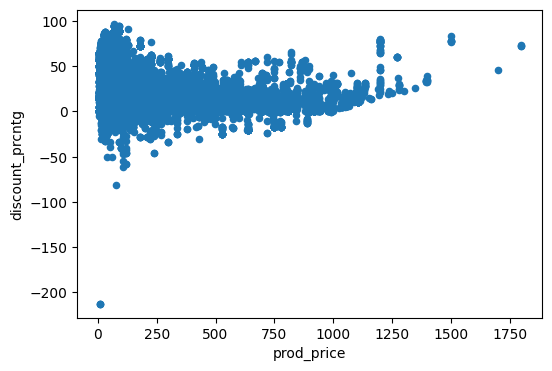

In [51]:
ol_prod_df_merge.plot.scatter(x="prod_price",
                              y="discount_prcntg",
                              figsize=(6,4)
                             );
                              # c="unit_price",
                              # s=50,
                              # cmap="viridis",
                              # );

In [58]:
ol_prod_df_merge.discount.describe(), ol_prod_df_merge.discount_prcntg.describe(), 

(count    53231.000000
 mean        26.116673
 std         45.545881
 min       -170.990000
 25%          5.250000
 50%         15.000000
 75%         31.000000
 max       1320.000000
 Name: discount, dtype: float64,
 count    53231.000000
 mean        21.376579
 std         18.144805
 min       -212.300000
 25%          9.100000
 50%         17.600000
 75%         28.600000
 max         97.100000
 Name: discount_prcntg, dtype: float64)

In [53]:
# quartiles
Q1 = ol_prod_df_merge["discount_prcntg"].quantile(0.25)
Q3 = ol_prod_df_merge["discount_prcntg"].quantile(0.75)
# interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
no_outliers_df = ol_prod_df_merge.loc[(ol_prod_df_merge["discount_prcntg"] >= (Q1 - 1.5*IQR)) & (ol_prod_df_merge["discount_prcntg"] <= (Q3 + 1.5*IQR)), :]

In [54]:
no_outliers_df.discount.describe()

count    49899.000000
mean        24.685970
std         37.465248
min       -131.330000
25%          5.000000
50%         14.000000
75%         29.680000
max        769.010000
Name: discount, dtype: float64

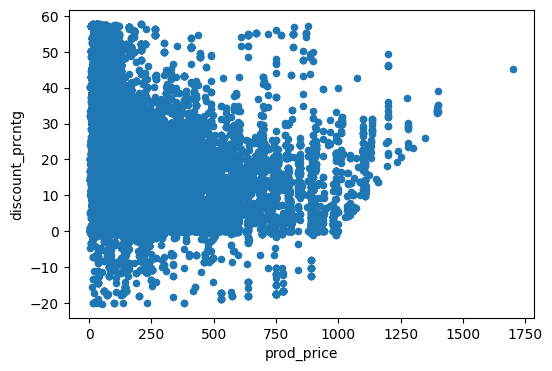

In [57]:
# Here we can see how Eniac has the major price fluctuations in the products around 100€.
# The higher the catalogue price the narrower the discounts -> sort of convergence towards the prod_price
no_outliers_df.plot.scatter(x="prod_price",
                              y="discount_prcntg",
                              figsize=(6,4)
                             );

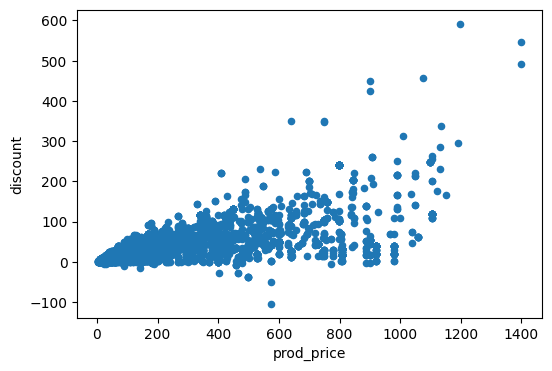

In [56]:
year = 2017
month = 11

no_outliers_df_per_month = no_outliers_df.loc[(no_outliers_df['date'].dt.year==year) & (no_outliers_df['date'].dt.month==month)]

no_outliers_df_per_month.plot.scatter(x="prod_price",
                              y="discount",
                              figsize=(6,4)
                             );

# TODO:

Now that you have your main analysis table, it would be a good moment to go back to the Case study and make sure you have the company’s goals in mind.
## When exploring discounts, make sure to always have the time dimension in consideration: Eniac does not always offer its products at the same price.
## A critical question, hence, is whether revenue grows whenever discounts increase.

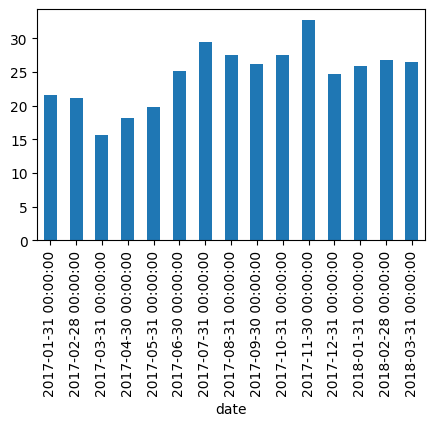

In [24]:
(
ol_prod_df_merge
    .resample("M", on="date")["discount"]
    .mean()
).plot.bar(figsize=(5,3));

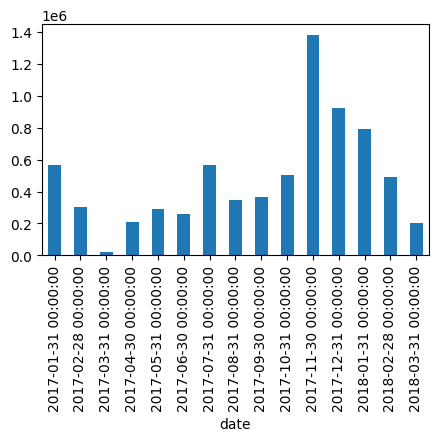

In [25]:
(
ol_prod_df_merge
    .resample("M", on="date")["unit_price"]
    .sum()
).plot.bar(figsize=(5,3));

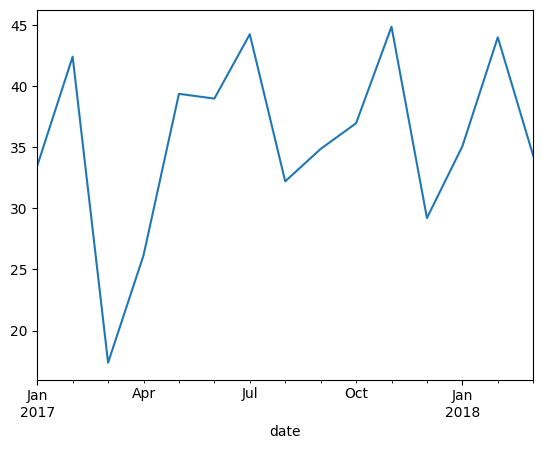

In [26]:
(
ol_prod_df_merge.groupby('sku').mean()
    .resample("M", on="date")["discount"]
    .mean()
).plot();

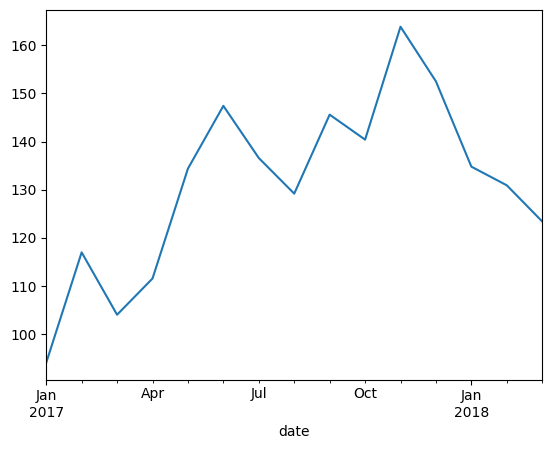

In [27]:
(
ol_prod_df_merge
    .resample("M", on="date")["unit_price"]
    .mean()
).plot();

In [31]:
ol_prod_df_merge.head()

,id,id_order,product_quantity,sku,unit_price,date,prod_price,discount,discount_prcntg
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,60.99,13.50,8.2
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,22.95,3.96,0.9
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,89.00,16.81,15.0
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,76.99,16.09,12.4
4,1119145,299561,1,PEB0015,142.49,2017-01-01 02:38:50,299.99,157.50,472.5


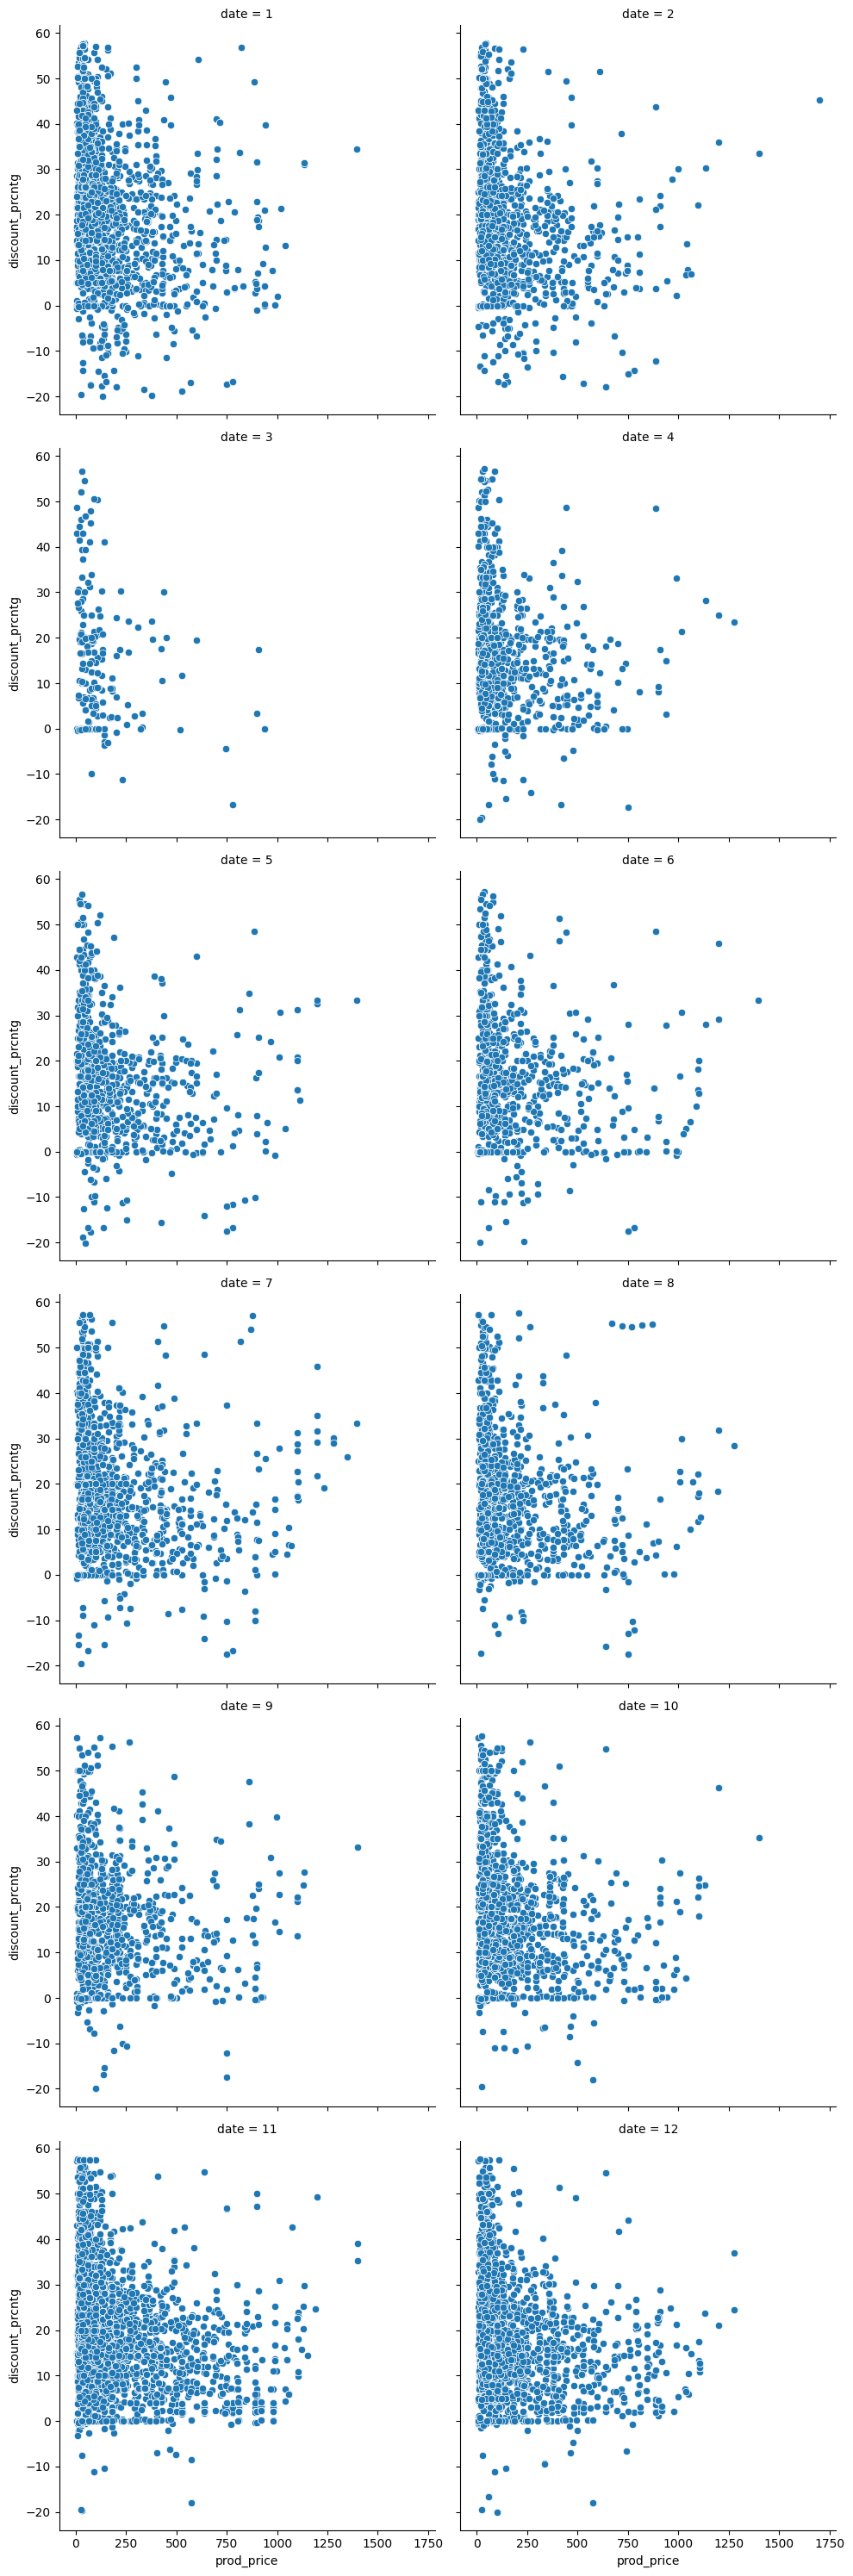

In [59]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.relplot(data=no_outliers_df.loc[(no_outliers_df.date.dt.year==2017)],
            x='prod_price',
            y="discount_prcntg",
            col=no_outliers_df.date.dt.month,
            col_wrap=2,
           );

/home/james/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


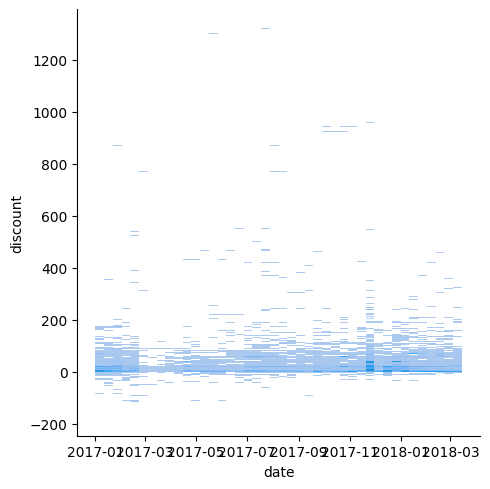

In [29]:
import seaborn as sns

sns.displot(data=ol_prod_df_merge, x="date", y='discount')#, hue="date")

# TODO
## How do seasonality and special dates (Christmas, Black Friday) affect sales?
## How could data collection be improved?
